# Biodiversity Studies in Lancanshire, UK

In this example we will see how to obtain records from the GBIF API. Insert them into the system for further analysis.


In [81]:
#First thing first. Load all the biospytial suit
import sys
%matplotlib inline
sys.path.append('/apps')
import django
django.setup()

## Selecting the region.
First we need to define a study region. For simplicity we will use a WGS84 GRS wit geographic coordinates. (This GSR is the standard and has no projection)


![Startig region](cumbria.png "The region")


We will use the Biospytial tools for generating a polygon in WKT (Well Known Text) format. The polygon will be 1 degree square with center at the lake district (Windemere).


In [91]:
from mesh import tools as tl
windemere = (-2.905,54.376)
carnforth = (-2.835,54.179) 
dd = tl.create_rectangle_from_two_points((0,0),(1,1),with_center=windemere)

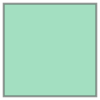

In [93]:
dd['polygon']

In [94]:
dd['polygon'].wkt

'POLYGON ((-3.405 53.876, -3.405 54.876, -2.405 54.876, -2.405 53.876, -3.405 53.876))'

## Create a Grid at several spatial resolutions

In [12]:
%time tl.createRegionalNestedGrid(parent_square=dd['polygon'],store_prefix="carnforth",n_levels=10)

INFO Generating Grid carnforth1
INFO Done: [(u'Table created',)]
INFO Generating Grid carnforth2
INFO Done: [(u'Table created',)]
INFO Generating Grid carnforth4
INFO Done: [(u'Table created',)]
INFO Generating Grid carnforth8
INFO Done: [(u'Table created',)]
INFO Generating Grid carnforth16
INFO Done: [(u'Table created',)]
INFO Generating Grid carnforth32
INFO Done: [(u'Table created',)]
INFO Generating Grid carnforth64
INFO Done: [(u'Table created',)]
INFO Generating Grid carnforth128
INFO Done: [(u'Table created',)]
INFO Generating Grid carnforth256
INFO Done: [(u'Table created',)]
INFO Generating Grid carnforth512
INFO Done: [(u'Table created',)]


CPU times: user 16min 52s, sys: 21.4 s, total: 17min 13s
Wall time: 1h 2min 53s


{0: 'mesh"."carnforth1',
 1: 'mesh"."carnforth2',
 2: 'mesh"."carnforth4',
 3: 'mesh"."carnforth8',
 4: 'mesh"."carnforth16',
 5: 'mesh"."carnforth32',
 6: 'mesh"."carnforth64',
 7: 'mesh"."carnforth128',
 8: 'mesh"."carnforth256',
 9: 'mesh"."carnforth512'}

### Uff! took a lot. Perhaps we don't need so much spatial resolution

## Get data from the GBIF API
We are going to test the api using a lancaster polygon (very simple, just a square)

In [98]:
square = tl.create_rectangle_from_two_points((0,0),(0.125,0.125),with_center=carnforth)

In [100]:
square['polygon'].wkt

'POLYGON ((-2.8975 54.1165, -2.8975 54.2415, -2.7725 54.2415, -2.7725 54.1165, -2.8975 54.1165))'

In [17]:
import drivers.populate as pop

In [19]:
test1 = pop.getOccurrencesDriver(lancaster)

In [22]:
test2 = pop.getOccurrenceN(lancaster)

In [25]:
test3 = pop.curateOccurrences(test2)

In [28]:
test3[0]

{u'basisOfRecord': u'HUMAN_OBSERVATION',
 u'catalogNumber': u'5134596',
 u'class': u'Liliopsida',
 u'classKey': 196,
 u'collectionCode': u'Observations',
 u'coordinateUncertaintyInMeters': 8.0,
 u'country': u'United Kingdom',
 u'countryCode': u'GB',
 u'crawlId': 66,
 u'datasetKey': u'50c9509d-22c7-4a22-a47d-8c48425ef4a7',
 u'datasetName': u'iNaturalist research-grade observations',
 u'dateIdentified': u'2017-02-19T14:26:21.000+0000',
 u'day': 29,
 u'decimalLatitude': 54.634415,
 u'decimalLongitude': -2.725071,
 u'eventDate': u'2017-01-29T15:10:00.000+0000',
 u'eventTime': u'15:10:00Z',
 u'extensions': {},
 u'facts': [],
 u'family': u'Amaryllidaceae',
 u'familyKey': 7682,
 u'gbifID': u'1453438929',
 u'genericName': u'Galanthus',
 u'genus': u'Galanthus',
 u'genusKey': 2855324,
 u'geodeticDatum': u'WGS84',
 u'http://unknown.org/occurrenceDetails': u'https://www.inaturalist.org/observations/5134596',
 u'identificationID': u'10492711',
 u'identifier': u'5134596',
 u'identifiers': [],
 u'ins

#### It works!

In [31]:
len(test3)

20

# Selection from irregular polygon Carnforth

We'll select the small forest close to Carnforth. Remmeber that we're going to make a field trip here.
First we need to select or draw a polygon. After this, it will be necessary to extract the WKT representation. 
This can be done with a GIS I recommend an open source like QGIS. It's a great option for that.
Anyways, the region looks like this:

![Carnforth](carnford_poly.png "The region")

And the WKT looks like this:


In [44]:
carnforth = """
POLYGON((-2.83563195691157111 54.17926928961760069,
-2.83539915731830927 54.18069011861378925,
-2.83413538809774712 54.18201358663966971,
-2.83140830714811242 54.18374570873312734,
-2.82961242457152329 54.18477716270070488,
-2.82791631324918979 54.18485500723890169,
-2.82222935175665857 54.18569182676827012,
-2.81853781534922598 54.18742379477898652,
-2.81541164938257182 54.18775461187626519,
-2.81374879514498932 54.18538045403823844,
-2.81221896924641435 54.18495231270554768,
-2.81158708463613261 54.18388193997721913,
-2.81311691053470847 54.18353163015696339,
-2.81215245507691058 54.18281153953918761,
-2.81221896924641435 54.18281153953918761,
-2.81201942673790395 54.18170218620905132,
-2.81205268382265583 54.18170218620905132,
-2.8132831959584661 54.18067065553266559,
-2.81228548341591722 54.17952231753204728,
-2.8112877708733679 54.17882162105333776,
-2.81058937209358373 54.17874376515618451,
-2.8105561150088314 54.17763430269558,
-2.81035657250032189 54.17706982791483483,
-2.81201942673790395 54.17794573375945788,
-2.81138754212762265 54.17673892532349811,
-2.81181988422939444 54.17646641531916174,
-2.81414788016200923 54.17860751698346178,
-2.81597701982334936 54.17779001852066756,
-2.81767313114568374 54.17706982791483483,
-2.81926947121376248 54.17605764694599202,
-2.82166398131588059 54.17543475403734021,
-2.82269495094318179 54.17502597546787513,
-2.82146443880737063 54.17397481202353759,
-2.82365940640097923 54.17294308859210616,
-2.82585437399458783 54.17342975379452952,
-2.82751722823216989 54.17629122936821062,
-2.82864796911372585 54.17545421958273266,
-2.83067665128357593 54.17525956371656548,
-2.83500007230128936 54.17814037698347107,
-2.83563195691157111 54.17926928961760069))
"""

## Now, let's try to bring all the Occurrences here

In [45]:
all_carnforth = pop.getAllOccurrences(carnforth)

WARNING Missing data in field 'catalogNumber':
WARNING Missing data in field 'catalogNumber':
WARNING Missing data in field 'specificEpithet':
DEBUG Retrieving information from the server. Offset:1
DEBUG:biospytial.gbif.taxonomy:Retrieving information from the server. Offset:1
WARNING Missing data in field 'catalogNumber':
WARNING Missing data in field 'specificEpithet':
WARNING Missing data in field 'catalogNumber':
DEBUG Retrieving information from the server. Offset:2
DEBUG:biospytial.gbif.taxonomy:Retrieving information from the server. Offset:2
WARNING Missing data in field 'specificEpithet':
WARNING Missing data in field 'catalogNumber':
WARNING Missing data in field 'catalogNumber':
DEBUG Retrieving information from the server. Offset:3
DEBUG:biospytial.gbif.taxonomy:Retrieving information from the server. Offset:3
WARNING Missing data in field 'specificEpithet':
WARNING Missing data in field 'catalogNumber':
WARNING Missing data in field 'catalogNumber':
WARNING Missing data in

In [46]:
len(all_carnforth)

31

In [48]:
len(all_carnforth[0])

20

We got all the records in the small forest in Carnforth. Approximatelly:

In [50]:
31 * 20 

620

ok, let's do some data processing. We know that each record in 'all_carnfort' is a list and also each element is another list. We can colapse all these nested lists into a single one using the 'reduce' function.

In [51]:
all_c = reduce(lambda l1,l2 :  l1 + l2 , all_carnforth)

In [52]:
len(all_c)

620

it can be that there are more records here but the server has a limit. We can explore this possibility later.

#### Let's continue our exploration

In [57]:
all_c[:10]

[None,
 None,
 <Occurrence: <GBIF Occurrence: 1202678246  scientific_name: Periparus ater (Linnaeus, 1758)>
  Kingdom: Animalia 
 ,	 Phylum: Chordata 
 ,	 	 Order: Passeriformes,
  	 	 	 Class: Aves, 
  	 	 	 	 Family: Paridae, 
  	 	 	 	 	 Location: s<\GBIF Occurrence>>,
 <Occurrence: <GBIF Occurrence: 1202679548  scientific_name: Turdus merula Linnaeus, 1758>
  Kingdom: Animalia 
 ,	 Phylum: Chordata 
 ,	 	 Order: Passeriformes,
  	 	 	 Class: Aves, 
  	 	 	 	 Family: Turdidae, 
  	 	 	 	 	 Location: s<\GBIF Occurrence>>,
 None,
 <Occurrence: <GBIF Occurrence: 1202679575  scientific_name: Phylloscopus trochilus (Linnaeus, 1758)>
  Kingdom: Animalia 
 ,	 Phylum: Chordata 
 ,	 	 Order: Passeriformes,
  	 	 	 Class: Aves, 
  	 	 	 	 Family: Phylloscopidae, 
  	 	 	 	 	 Location: s<\GBIF Occurrence>>,
 <Occurrence: <GBIF Occurrence: 1202679571  scientific_name: Larus marinus Linnaeus, 1758>
  Kingdom: Animalia 
 ,	 Phylum: Chordata 
 ,	 	 Order: Charadriiformes,
  	 	 	 Class: Aves, 
  	

*Ohh!* There are empty records. The reason for this is that maybe an important field (attribute) was missing. *Biospytial* needs certain attributes for modelling and analysis and if we don't have them there's no reason to keep that record.
Let's get rid of these null elements first.

In [62]:
carnforth_occurrences = filter(lambda record : record is not None , all_c)

In [63]:
len(carnforth_occurrences)

213

## Inserting in the local database

We are in a possition now to insert the new data in our local database.
 .... Fingers crossed .. 

This means! no problem. We can load the results in a database connection in QGIS. 
The result should look like this:
![Carnforth](carnford_poly_points.png "The region")


### What! Only 2 occurrences ?!

In [68]:
carnforth_occurrences[:10]

[<Occurrence: <GBIF Occurrence: 1202678246  scientific_name: Periparus ater (Linnaeus, 1758)>
  Kingdom: Animalia 
 ,	 Phylum: Chordata 
 ,	 	 Order: Passeriformes,
  	 	 	 Class: Aves, 
  	 	 	 	 Family: Paridae, 
  	 	 	 	 	 Location: s<\GBIF Occurrence>>,
 <Occurrence: <GBIF Occurrence: 1202679548  scientific_name: Turdus merula Linnaeus, 1758>
  Kingdom: Animalia 
 ,	 Phylum: Chordata 
 ,	 	 Order: Passeriformes,
  	 	 	 Class: Aves, 
  	 	 	 	 Family: Turdidae, 
  	 	 	 	 	 Location: s<\GBIF Occurrence>>,
 <Occurrence: <GBIF Occurrence: 1202679575  scientific_name: Phylloscopus trochilus (Linnaeus, 1758)>
  Kingdom: Animalia 
 ,	 Phylum: Chordata 
 ,	 	 Order: Passeriformes,
  	 	 	 Class: Aves, 
  	 	 	 	 Family: Phylloscopidae, 
  	 	 	 	 	 Location: s<\GBIF Occurrence>>,
 <Occurrence: <GBIF Occurrence: 1202679571  scientific_name: Larus marinus Linnaeus, 1758>
  Kingdom: Animalia 
 ,	 Phylum: Chordata 
 ,	 	 Order: Charadriiformes,
  	 	 	 Class: Aves, 
  	 	 	 	 Family: Larida

In [69]:
o = carnforth_occurrences[0]

In [72]:
o.geom.wkt

u'POINT (-2.82074 54.17848)'

In [73]:
points = map(lambda o : o.geom.wkt, carnforth_occurrences)

In [87]:
points[:10]

[u'POINT (-2.82074 54.17848)',
 u'POINT (-2.82074 54.17848)',
 u'POINT (-2.82074 54.17848)',
 u'POINT (-2.82074 54.17848)',
 u'POINT (-2.82074 54.17848)',
 u'POINT (-2.82074 54.17848)',
 u'POINT (-2.82074 54.17848)',
 u'POINT (-2.82074 54.17848)',
 u'POINT (-2.82074 54.17848)',
 u'POINT (-2.82074 54.17848)']

No, just that everybody registered that same point! 
Don't do that pleasEE!

Let's see if we can get more data from there

In [77]:
more_carnforth = pop.getAllOccurrences(carnforth,offset=32)